In [189]:
import pandas as pd
import numpy as np

In [18]:
data = pd.read_excel(r'C:\Users\Sarah\Downloads\Module2_Use_Case_2.xlsx')

In [19]:
data['Gender_cat'].value_counts()

Male      349
Female    341
Name: Gender_cat, dtype: int64

In [7]:
# need to select 34 females and 34 males from the data set (10% of each)

In [8]:
data.describe()

,ID,Salary,Gender
count,690.000000,690.000000,690.000000
mean,345.500000,6114.721739,1.517391
std,199.330128,2319.471502,0.500060
min,1.000000,2010.000000,1.000000
25%,173.250000,4107.500000,1.000000
50%,345.500000,6238.500000,2.000000
75%,517.750000,8166.000000,2.000000
max,690.000000,9995.000000,2.000000


In [28]:
# Strat dataframes
data_strat_male = data[["ID", "Salary"]][data["Gender_cat"] == "Male"] # create new DF with columns ID and Salary, and with Gender_cat = Male
data_strat_female = data[["ID", "Salary"]][data["Gender_cat"] == "Female"] # create new DF with columns ID and Salary, and with Gender_cat = Male


# Sampling
data_sample_female = data_strat_female.sample(n=34)
data_sample_male = data_strat_male.sample(n=35)

In [32]:
data_sample_female.to_excel('data_female.xlsx')

In [33]:
data_sample_male.to_excel('data_male.xlsx')

In [35]:
sample = pd.concat((data_sample_female, data_sample_male), axis=0)
sample.to_excel('sample.xlsx')

In [36]:
sample.describe()
#here to find mean

,ID,Salary
count,69.000000,69.000000
mean,323.318841,6137.376812
std,194.930417,2346.810477
min,1.000000,2107.000000
25%,181.000000,3765.000000
50%,321.000000,6637.000000
75%,481.000000,8212.000000
max,675.000000,9893.000000


In [37]:
sample.median()

ID         321.0
Salary    6637.0
dtype: float64

In [42]:
sample.mode()

,ID,Salary
0,1.0,2107.0
1,15.0,2140.0
2,22.0,2301.0
3,29.0,2490.0
4,36.0,2548.0
...,...,...
64,636.0,9376.0
65,640.0,9392.0
66,657.0,9422.0
67,666.0,9425.0


In [48]:
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='Frequency'>

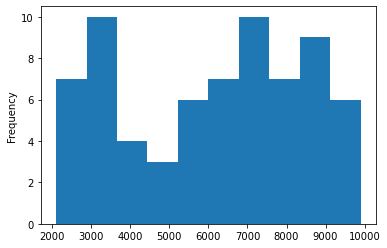

In [49]:
sample['Salary'].plot.hist() #show sample as Histogram

(array([20., 10., 20., 19.]),
 array([2107. , 4053.5, 6000. , 7946.5, 9893. ]),
 <BarContainer object of 4 artists>)

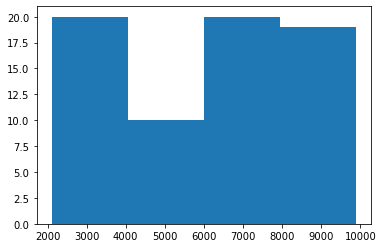

In [52]:
plt.hist(sample['Salary'], bins = 4) 


In [169]:
sample['salary_bins'] = pd.cut(x=sample['Salary'], bins=[2000, 4000, 6000, 8000, 10000])
#create new columns salary_bins where the bins are determined


In [170]:
x = sample.groupby(['salary_bins']).agg('count')


In [171]:
x

,ID,Salary
salary_bins,,
"(2000, 4000]",18,18
"(4000, 6000]",12,12
"(6000, 8000]",20,20
"(8000, 10000]",19,19


In [172]:
x['Midpoint']= ''

In [174]:
for i in range(len(x.index)):
    if x.iloc[i, 2] == '':
        x.iloc[i,2] = x.index[i].mid

In [184]:
x

,ID,Salary,Midpoint,Midpoint_frequency
salary_bins,,,,
"(2000, 4000]",18,18,3000.0,54000.0
"(4000, 6000]",12,12,5000.0,60000.0
"(6000, 8000]",20,20,7000.0,140000.0
"(8000, 10000]",19,19,9000.0,171000.0


In [178]:
x['Midpoint_frequency']=x['Salary']*x['Midpoint']

In [182]:
total_obs = x['Salary'].sum()
total_obs

69

In [186]:
total_to_div=x['Midpoint_frequency'].sum()
total_to_div

425000.0

In [188]:
mean = total_to_div/total_obs
mean

6159.420289855072

In [194]:
x['cum_freq']= np.cumsum(x['Salary'])
x

,ID,Salary,Midpoint,Midpoint_frequency,cum_freq
salary_bins,,,,,
"(2000, 4000]",18,18,3000.0,54000.0,18
"(4000, 6000]",12,12,5000.0,60000.0,30
"(6000, 8000]",20,20,7000.0,140000.0,50
"(8000, 10000]",19,19,9000.0,171000.0,69


In [195]:
#CALCULATING MEDIAN OF CLASS
step1 = total_obs/2
step1 #N/2

34.5

In [198]:
# find group (median class) that includes the value of step 1 - here should be 3rd class -> cum freq from 30 to 50
l = 6000 # lower border of median class
m = 30 # where the N/2 is situated
f = 20 # frequency of median class
c = 2000 #width of class (6000-8000)

median = l+(step1-m)/f*c
median

6450.0

In [200]:
# CALCULATION MODE OF CLASS
# mod_class is 6000 - 8000
L = 6000 #lower border of mode class
h = 2000 #size of class interval
f1 = 20 #frequency of modal class
f0 = 12 #frequency of class preceding
f2 = 19 #frequency of class succeeding 

mode= L+((f1-f0)/(2*f1-f0-f2))*h
mode

7777.777777777777

In [201]:
x

,ID,Salary,Midpoint,Midpoint_frequency,cum_freq
salary_bins,,,,,
"(2000, 4000]",18,18,3000.0,54000.0,18
"(4000, 6000]",12,12,5000.0,60000.0,30
"(6000, 8000]",20,20,7000.0,140000.0,50
"(8000, 10000]",19,19,9000.0,171000.0,69


In [214]:
#CALCULATION OF STANDARD DEVIATION 
# Var = (sumf(x-mean)²)/n
# std = root of var 

var = (18*(3000-mean)**2+12*(5000-mean)**2+20*(7000-mean)**2+19*(9000-mean)**2)/(69-1)
var



5341858.482523445

In [215]:
std = var**0.5
std

2311.2460886983554